<a href="https://colab.research.google.com/github/Yumna2611/TSF_Internship-Dec2021-/blob/main/TSF_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1: Prediction using Supervised ML
**Problem Statement: Predict the percentage of a student based on the number of study hours.**

**Dataset**: http://bit.ly/w-data
# Author: Yumna Khan

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#Data visualization 
import matplotlib.pyplot as plt  
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data from the given link
stu_data = pd.read_csv("http://bit.ly/w-data")
print('Data imported successfully from the given link')

Data imported successfully from the given link


In [3]:
#Loading the data
stu_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
stu_data.shape

(25, 2)

In [ ]:
stu_data.info()
# No null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
stu_data.columns

Index(['Hours', 'Scores'], dtype='object')

# Visualization

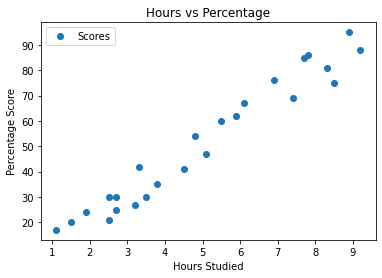

In [4]:
#Analyzing the distribution of scores
# Scatter plot
stu_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

We can see that there is a positive **linear** relation between the two variables(Percentage increases with the rise in number of study hours).

# Splitting the Data

In [5]:
# Dividing into source and target variables
# Source - Hours
# Target - Scores
X = stu_data.drop(['Scores'],axis=1)
y = stu_data.Scores


The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the **train_test_split()** function.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
X_train.head()

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [ ]:
y_train.head()

22    35
17    24
24    86
23    76
14    17
Name: Scores, dtype: int64

# Training the Algorithm

In [7]:
#Importing Linear Regression model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Data training done.")

Data training done.


# Plotting the Regression line

In [8]:
# Evaluating slope & intercept
print('Slope: ', model.coef_)
print('Intercept: ', model.intercept_)

Slope:  [9.91065648]
Intercept:  2.018160041434662


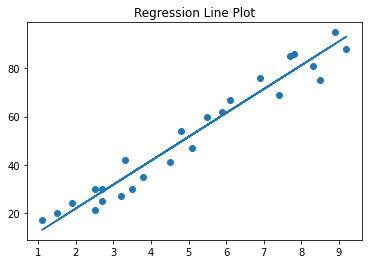

In [9]:
# Equation of a line: y = m*x +c 
# where m - slope, c - intercept

line = model.coef_* X + model.intercept_

# Plotting for the test data
plt.title('Regression Line Plot')
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Accuracy & Evaluation

In [ ]:
trainAcc = round(model.score(X_train, y_train)*100, 2)
print('Training Accuracy : ', trainAcc)

Training Accuracy :  95.16


In [ ]:
testAcc = round(model.score(X_test, y_test)*100, 2)
print('Testing Accuracy : ', testAcc)

Testing Accuracy :  94.55


In [ ]:
# Using Mean Absolute error for evaluating our model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# Making Prediction

In [ ]:
# Testing data - In Hours
print(X_test) 
y_pred = model.predict(X_test)
y_pred

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Comparing Actual vs Predicted
Comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Comp

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [10]:
# Predicting with own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours entered = {} hrs/day".format(hours))
print("Predicted Score = {} %".format(own_pred[0]))

No of Hours entered = 9.25 hrs/day
Predicted Score = 93.69173248737539 %


# Conclusion
 - Successfully trained the model using Linear Regression and predicted the percentage of a student based on the number of study hours.
 - Training accuracy was found out to be 95.16%
 - Testing acccuracy was found out to be 94.55% 
 - Compared the actual and Predicted values in hours for the test data
 - Also predicted the percentage score by passing the value to the model; For a student who studied for **9.25** hours/day the percentage score came out to be **93.69%**
 - Evaluated the model's performance using Mean Absolute Error that was found out to be **4.18**.